In [52]:
# 필요한 모듈 삽입 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [53]:
# 타이타닉 데이터 로드 => titanic 변수에 저장 
titanic = sns.load_dataset('titanic') # 데이터프레임 형식
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [54]:
# titanic이 몇개의 행과 열로 구성된 데이터프레임인지 확인 => shape
titanic.shape 

(891, 15)

In [55]:
# titanic의 컬럼명 확인 => columns
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [56]:
# titanic의 맨 앞, 맨 뒤 2개의 열 출력
display(titanic.head(2), titanic.tail(2))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [57]:
# titanic의 각 column들의 non-null 데이터 개수와 데이터 type 파악하기 => info()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [58]:
# titanic 변수에 담겨있는 숫자(numeric)들의 분포 특성 요약 => 누락데이터는 제외되고 통계량을 요약해준다.
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---

In [59]:
# titanic 에서 사용할 데이터(survived, sex ,age, fare, class, who) column에 해당하는 데이터만 추출 => df 변수에 저장
df = titanic[['survived', 'sex' ,'age', 'fare', 'class', 'who']]

In [60]:
# 남성, 여성, 어린이 승객 수 확인 
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

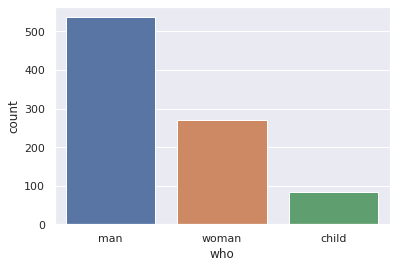

In [61]:
#  남성, 여성, 어린이 승객 수 시각화 => seaborn 사용
sns.countplot(x='who',data=df)
plt.show()

In [62]:
# survived의 각 변수별 데이터의 수 확인. 산 사람(1)은 몇명이고 죽은 사람(0)은 몇명인가 추출
# df['survived'].value_counts()
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

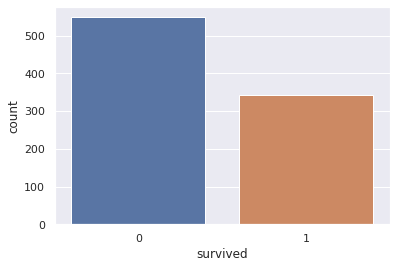

In [63]:
#  산 사람과 죽은 사람의 수 count하여 시각화 => seaborn 사용
sns.countplot(x='survived',data=df)
plt.show()

In [64]:
# who 변수의 unique한 데이터 확인 및 출력
print(df['who'].unique())

['man' 'woman' 'child']


In [65]:
# class 변수의 unique한 데이터 확인 및 출력
print(df['class'].unique())

['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']


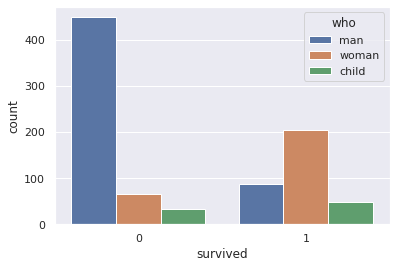

In [66]:
# who(hue) 변수별로 survived(x)한 사람의 수를 count하여 시각화 (seaborn 사용) 
sns.countplot(x='survived', hue='who',data=df)

**남성 승객이 여성과 어린이 승객에 비해 사망 확률이 多**

---

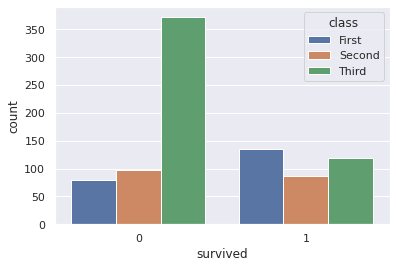

In [67]:
# class 변수별로 survived한 사람의 수를 count하여 시각화 (seaborn 사용) 
sns.countplot(x='survived', hue='class',data=df)

**3등석 승객이 다른 승객에 비해 사망 확률이 多**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


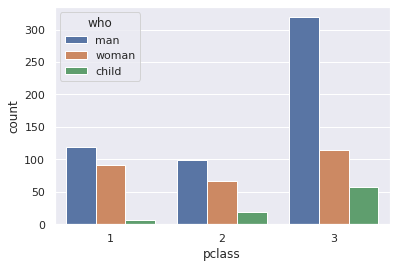

In [68]:
# 각 등급의 좌석에 어떠한 사람들이 탔는지 출력  
sns.countplot('pclass', hue='who',data=titanic, order= [1,2,3])


**3등석에 남성 승객이 多**

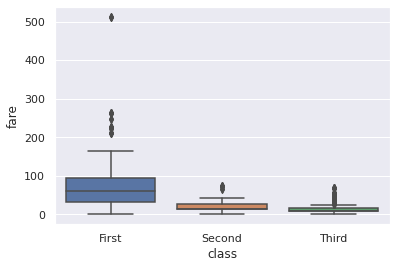

In [69]:
# class 변수별 fare값의 분포를 boxplot으로 시각화 => seaborn 사용
sns.boxplot(x='class',y='fare',data=df)

---

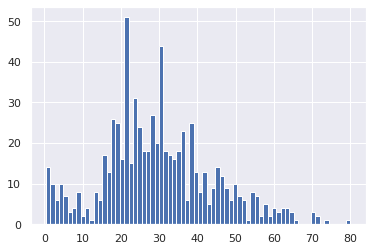

In [70]:
# 승객들의 나이에 대한 분석 => 변수에 대한 히스토그램 출력 => hist 
df['age'].hist(bins=70)

**타이타닉 호에는 20 ~ 30대 승객이 많이 탑승해있다.**
>



In [71]:
# titanic 데이터프레임에서 age 변수 값이 NaN이 아닌 데이터들만 뽑아서 age_exist 라는 변수에 할당
age_exist = titanic[titanic .age.notnull()]

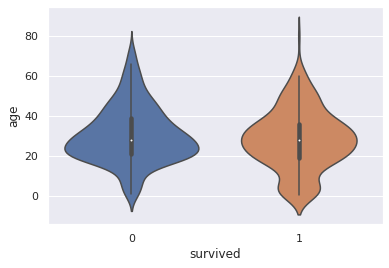

In [72]:
# age_exist에서 survived별 age를 violinplot으로 나타sorl => seaborn 사용
sns.violinplot(x='survived',y='age',data=age_exist)
plt.show()

In [73]:
# for문을 이용하여 연령별로 승객을 구분하기 = >  '0~9', '10~19', '20~29', '30~39', '40~49', '50~59', '60~'
age_spec = []

for a in age_exist.age:
    ten = a // 10
    if ten == 0:
        age_spec.append('0~9')
    elif ten >= 6:
        age_spec.append('60~')
    else:
         # ten이 1.0, 2.0 이런식으로 나오지 않도록 int형으로 설정 
        age_spec.append('{}0~{}9'.format(int(ten), int(ten)))

In [74]:
# age_spec을 ti의 age_spec 이라는 열로 추가
age_exist['age_spec'] = age_spec
# age_exist의 맨 앞 2개의 행, 맨 뒤 2개의 행 한번에 확인하기
display(age_exist.head(3), age_exist.tail(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_spec
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20~29
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30~39
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20~29


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_spec
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,10~19
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,20~29
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,30~39


In [75]:
# 연령별 데이터의 수 확인. 
age_exist.age_spec.value_counts()

20~29    220
30~39    167
10~19    102
40~49     89
0~9       62
50~59     48
60~       26
Name: age_spec, dtype: int64

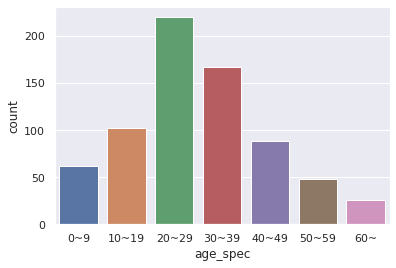

In [76]:
# 연령별로 사람의 수를 시각화 => seaborn 사용
sns.countplot(x='age_spec',data=age_exist, order=['0~9', '10~19', '20~29', '30~39', '40~49', '50~59', '60~'])

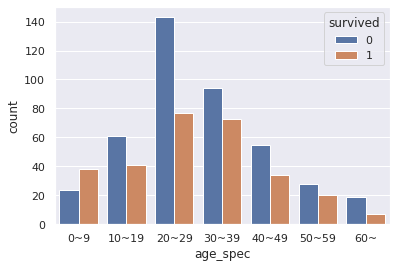

In [77]:
# 위 그래프에 survived(hue)정보도 추가로 시각화 => seaborn 사용
sns.countplot(x='age_spec',hue='survived',data=age_exist, order=['0~9', '10~19', '20~29', '30~39', '40~49', '50~59', '60~'])

---

In [78]:
# deck 변수의 unique한 데이터 확인 및 출력 => unique
titanic['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

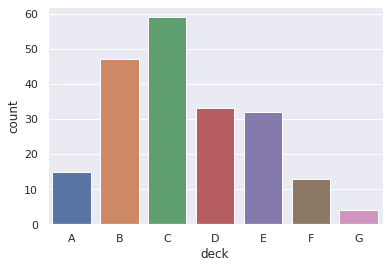

In [79]:
# deck별 사람의 수 count하여 시각화 (seaborn 사용)
sns.countplot(x='deck',data=titanic)

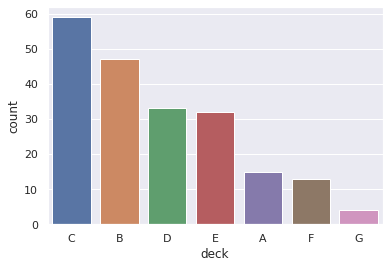

In [80]:
# 사람이 많은 deck 순서대로 정렬 
sns.countplot(x='deck',data=titanic, order=titanic.deck.value_counts().index)

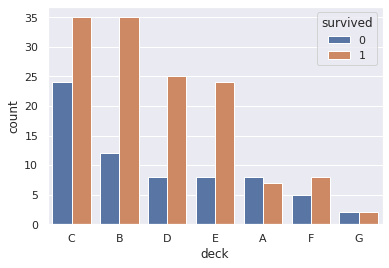

In [81]:
# deck 별로 survived한 사람의 수를 시각화 => seaborn 사용 
sns.countplot(x='deck',hue='survived', data=titanic, order=titanic.deck.value_counts().index)

**- Deck(갑판)**: C에 위치한 승객이 많이 살기도 죽기도 하였다 + B,D,E에 위치한 승객들은 승객 수 대비 많이 살아남았다.<br>**- 참고해야할 사항**: 죽은 사람의 경우 어느 deck에서 탔는지 알 수 없다 => deck가 NaN 값인 데이터의 경우 survived 값이 0인 경우가 많을 수 있다.

In [82]:
# titanic 데이터프레임에서 deck 변수 값이 NaN이 아닌 데이터들만 추출=> deck_exist 라는 변수에 할당 (notnull 사용)
deck_exist = titanic[titanic.deck.notnull()]
# deck_exist의 행과 열의 개수 확인 => 891명의 승객 중 203명 
deck_exist.shape

(203, 15)

In [83]:
# deck_exist의 맨 앞 3개의 행, 맨 뒤 3개의 행 한번에 확인하기
display(deck_exist.head(3), deck_exist.tail(3))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


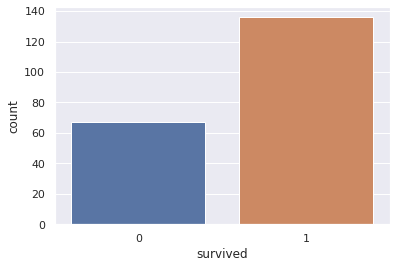

In [84]:
# deck_exist 데이터에서 survived별 사람의 수 count하여 시각화
sns.countplot(x='survived',data=deck_exist)

**deck정보가 있는 승객의 경우 생존한 사람이 多**

In [85]:
# titanic 데이터프레임에서 deck 변수 값이 NaN인 데이터들만 뽑아서 deck_not 라는 변수에 할당 => 688명의 승객
deck_not = titanic[titanic.deck.isnull()]
deck_not

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


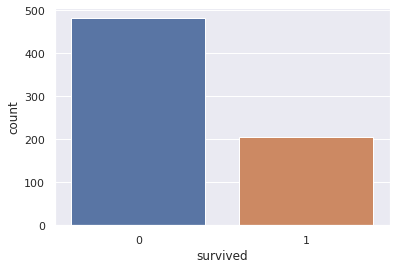

In [86]:
# deck_not 데이터에서 survived별 사람의 수 count하여 시각화
sns.countplot(x='survived',data=deck_not)

**deck정보가 없는 승객의 경우 사망한 사람이 多**

---

In [87]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [88]:
# 가족 데이터를 이용하여 데이터 분석 =>  sibsp(함께 탑승한 형제와 배우자의 수) + parch(함께 탑승한 부모, 아이의 수)
# 자신을 포함해야하니 1을 더해야 한다.
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch'] + 1 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [89]:
# 가장 많은 가족 수 와 가장 적은 가족 수을 출력 
print("Maximum size of Family : ", titanic['FamilySize'].max())
print("Minimum size of Family : ", titanic['FamilySize'].min())

Maximum size of Family :  11
Minimum size of Family :  1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags

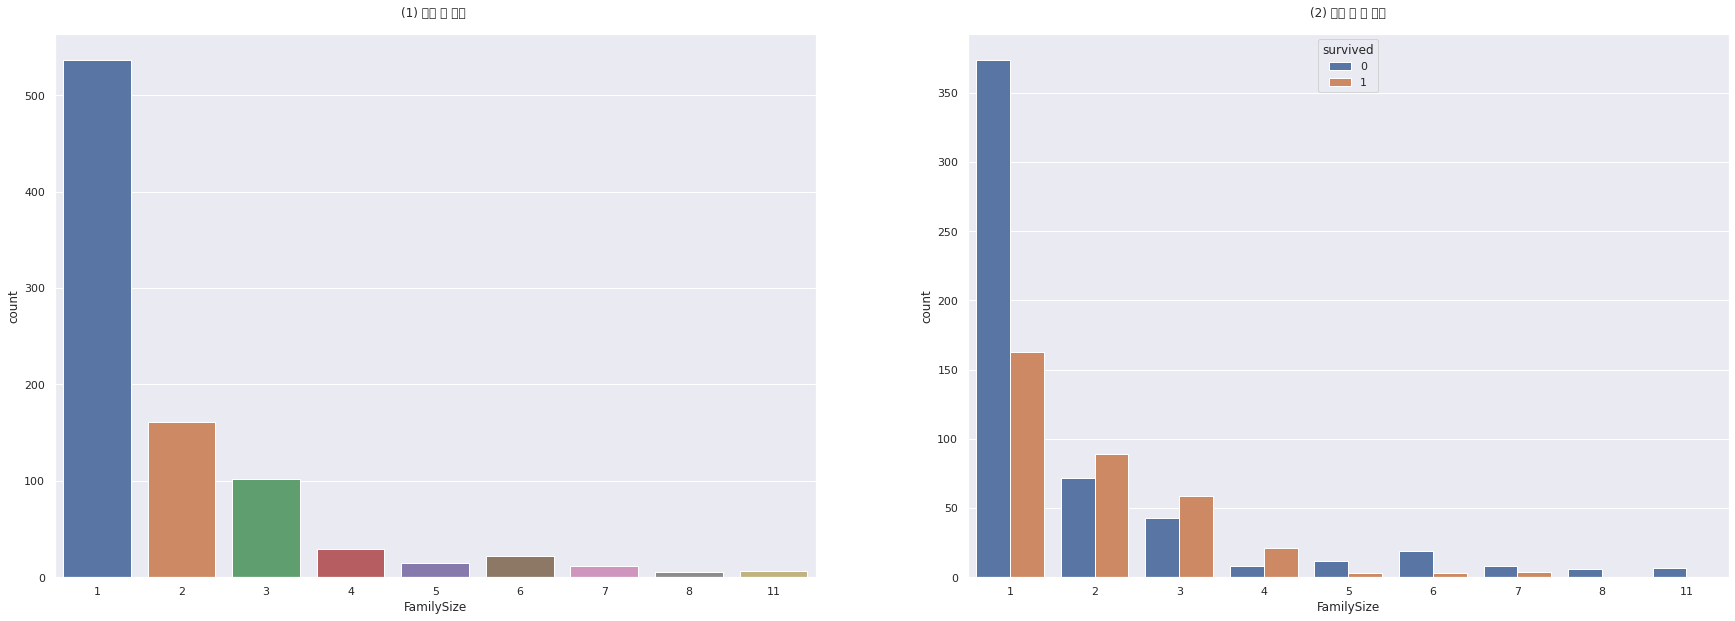

In [96]:
f,ax=plt.subplots(1, 2, figsize=(30, 10))

sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

sns.countplot(x='FamilySize', data=titanic, ax=ax[0])
# 제일 앞에 원래라면 x='FamilySize'라고 해야지만 'x='이 생략되었다.
# 저 뜻은 엑셀에서 구분 짓는 어떤 스키마를 지정해준다는 뜻이다.
ax[0].set_title('(1) 가족 수 분류 ', y=1.02)

sns.countplot('FamilySize', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('(2) 가족 수 별 생존', y=1.02)

plt.show()

**혼자인 경우, 가족 수가 너무 많은 경우 사망 확률 多 => 가족 수 가  2~4명 인 경우 생존 확률이 높다.**

---

In [102]:
# embarked(탑승한 항구) data분석 
print(titanic['embarked'].unique())
print(titanic['embarked'].shape)

['S' 'C' 'Q' nan]
(891,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

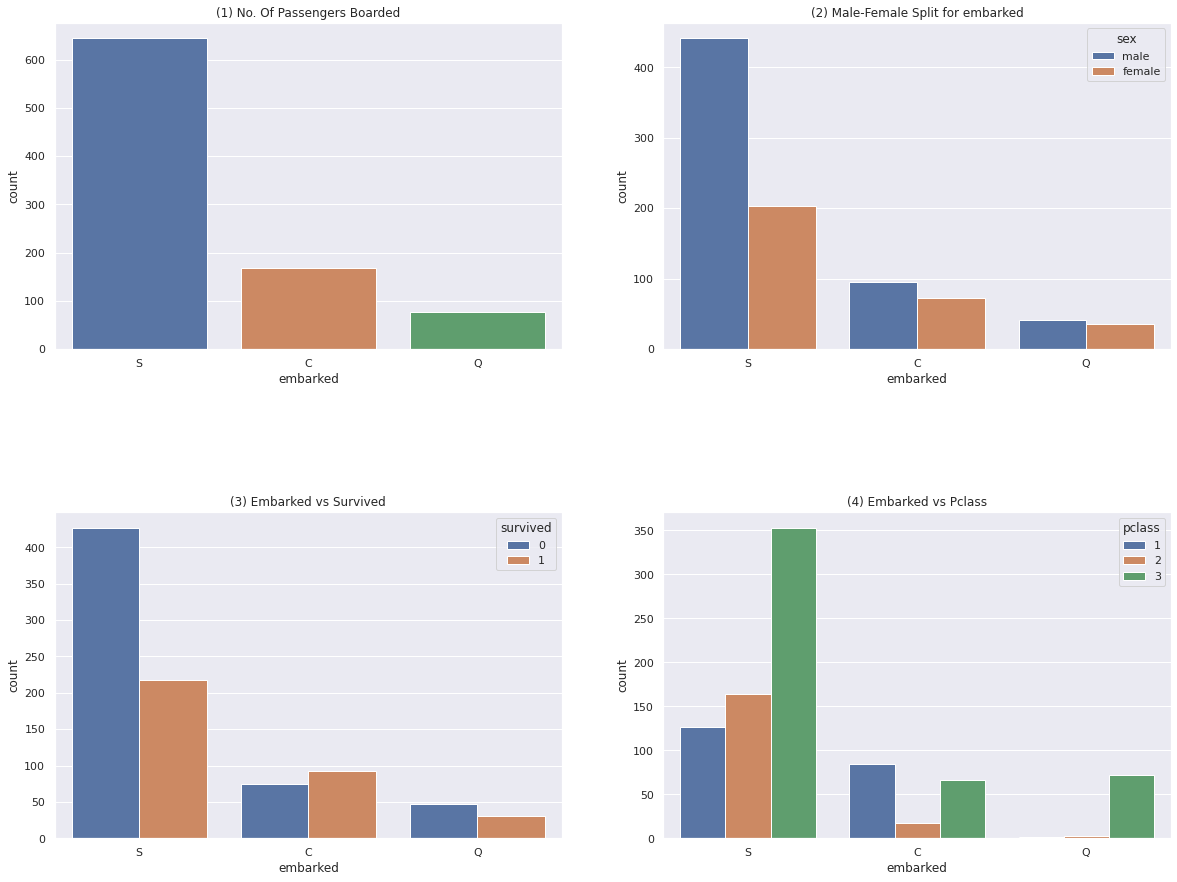

In [104]:
f,ax=plt.subplots(2,2,figsize=(20,15))
# 2x2행렬 그래프를 그린다.
sns.countplot('embarked', data=titanic, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('embarked', data=titanic, hue='sex', ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for embarked')
sns.countplot('embarked', hue='survived', data=titanic, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('embarked', data= titanic, hue='pclass', ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. **S (Southampton) 에서 가장 많은 사람이 탑승했으며, 남자가 더 많이 탑승했다**.
2. **생존 확률은 S에서 가장 낮다.**
3. **C (Cherbourg) 에서 클래스가 높은 사람이 많이 타서 생존율이 높다.**